Single Layer Perceptron (SLP)

not,
or,
and
이 3개 논리는 가능

In [ ]:
import numpy as np

# 시그모이드 활성화 함수 -> 출력 값의 범위를 0에서 1이내로 하기 위해 사용
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

# SLP 구현 (하드 코딩된 가중치와 편향)
#-> 이를 입력 값의 각 항에 곱하고 전체를 더해
#   입력값이 어떤 label값에 근접한지를 파악
def forward_slp(X, W, b):
    Z = np.dot(W, X) + b  # 선형 변환
    A = sigmoid(Z)  # 시그모이드 활성화 함수 적용
    return A

# 입력 데이터 예시 (특징 3개)
X = np.array([[1], [2], [3]])  # 입력 데이터

# 하드코딩된 가중치와 편향
W = np.array([[0.2, 0.4, 0.6]])  # 1x3 크기 (하나의 노드)
b = np.array([[0.5]])  # 편향

# SLP 순전파
# 각 입력값에 대한 weight를 곱하고, bias를 포함한 값을 다 더한다.
output_slp = forward_slp(X, W, b)

print("Single Layer Perceptron 출력:", output_slp)

Single Layer Perceptron 출력: [[0.96442881]]


MLP


In [2]:
import numpy as np

# ReLU 활성화 함수  다음 layer에 값을 전달하기 위해 사용한다.
def relu(z):
    return np.maximum(0, z)

# 소프트맥스 함수 -> 출력 뉴런이 여러 개일 때 주로 사용된다.
#                    여러 개의 출력값을 정규화한 것과 같다.
def softmax(z):
    exp_z = np.exp(z - np.max(z))  # 안정성을 위한 처리
    return exp_z / np.sum(exp_z, axis=0)

# MLP 구현 (하드 코딩된 가중치와 편향)
def forward_mlp(X, parameters):
    # 첫 번째 은닉층
    W1 = parameters['W1']
    b1 = parameters['b1'] #1차함수에서 y축 절편
    Z1 = np.dot(W1, X) + b1
    A1 = relu(Z1) #hidden layer에서 사용하는 active function

    # 출력층
    W2 = parameters['W2']
    b2 = parameters['b2']
    Z2 = np.dot(W2, A1) + b2
    A2 = softmax(Z2)

    return A2

# 입력 데이터 예시 (특징 3개)
X = np.array([[1], [2], [3]])  # 입력 데이터

# 하드코딩된 가중치와 편향
parameters = {
    'W1': np.array([[0.1, 0.2, 0.3], [0.4, 0.5, 0.6], [0.7, 0.8, 0.9], [1.0, 1.1, 1.2]]),  # 은닉층 가중치 (4x3)
    'b1': np.array([[0.1], [0.2], [0.3], [0.4]]),  # 은닉층 편향 (4x1)
    'W2': np.array([[0.1, 0.2, 0.3, 0.4], [0.5, 0.6, 0.7, 0.8]]),  # 출력층 가중치 (2x4)
    'b2': np.array([[0.1], [0.2]])  # 출력층 편향 (2x1)
}

# MLP 순전파
output_mlp = forward_mlp(X, parameters)

print("Multi-Layer Perceptron 출력:", output_mlp)

Multi-Layer Perceptron 출력: [[8.58041227e-04]
 [9.99141959e-01]]


음성 데이터를 활용한 발음기호(IPA) 전사 및 시각화 실습

In [3]:
!mkdir -p gsc
%cd gsc
!wget -q https://storage.googleapis.com/download.tensorflow.org/data/speech_commands_v0.02.tar.gz
!tar -xf speech_commands_v0.02.tar.gz
%cd ..

/content/gsc
/content


In [4]:
!pip install -q librosa soundfile pronouncing

  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 939.4/939.4 kB 14.1 MB/s eta 0:00:00


In [5]:
import os, librosa, librosa.display
import matplotlib.pyplot as plt
import numpy as np
import soundfile as sf
from IPython.display import Audio, display
import pronouncing

In [6]:
# 예시 단어 (GSC에 포함된 단어 중 하나)
word = "three"
root = f"gsc/{word}"

# 파일 리스트에서 하나 선택
file = [f for f in os.listdir(root) if f.endswith(".wav")][0]
path = os.path.join(root, file)

# 오디오 로드
y, sr = librosa.load(path, sr=16000)

[재생 중]: 772db621_nohash_0.wav


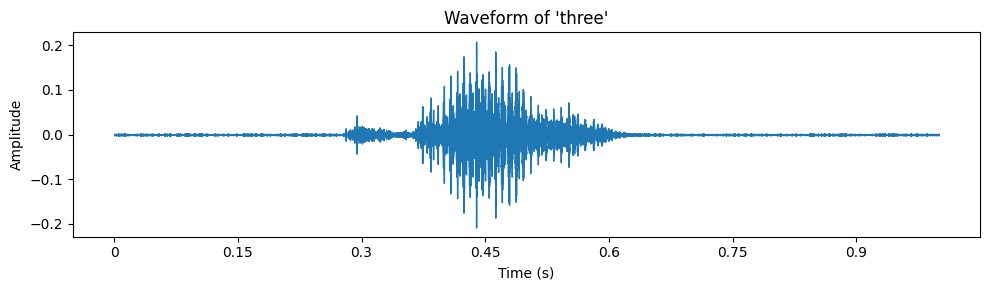

In [7]:
# 오디오 재생
print(f"[재생 중]: {file}")
display(Audio(y, rate=sr))

# 파형 시각화
plt.figure(figsize=(10, 3))
librosa.display.waveshow(y, sr=sr)
plt.title(f"Waveform of '{word}'")
plt.xlabel("Time (s)")
plt.ylabel("Amplitude")
plt.tight_layout()
plt.show()

In [8]:
# CMU Dictionary 기반 음소 추출
phones = pronouncing.phones_for_word(word)
print(f"[CMU 음소]: {phones[0]}")  # 예: "TH R IY1"

# 간단한 ARPAbet → IPA 매핑
arpabet_to_ipa = {# dictionary 자료구조로 key값과 value값이 1대1 대응됨
    "TH": "θ", "R": "ɹ", "IY": "i", "IY1": "iː", "IY0": "i", "IY2": "i",
    "F": "f", "AY": "aɪ", "V": "v", "Z": "z", "EH": "ɛ", "T": "t", "UW": "uː",
    "N": "n", "S": "s", "AO": "ɔ", "ER": "ɝ", "OW": "oʊ", "W": "w", "B": "b",
    "D": "d", "AH": "ʌ", "K": "k", "G": "ɡ", "M": "m", "L": "l", "P": "p",
    "Y": "j", "CH": "tʃ", "SH": "ʃ", "ZH": "ʒ"
}

# ARPAbet 분해
arpabet = phones[0].split()
ipa_seq = [arpabet_to_ipa.get(p.strip("012"), p) for p in arpabet]
ipa_text = " ".join(ipa_seq)

# IPA 출력
print(f"[IPA 전사]: {ipa_text}")

[CMU 음소]: TH R IY1
[IPA 전사]: θ ɹ i


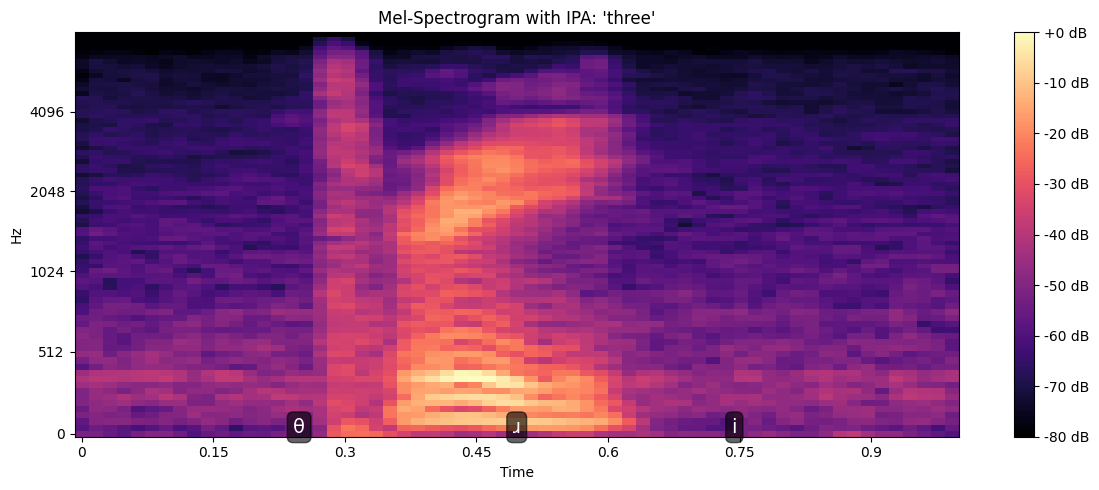

In [9]:
# 멜스펙트로그램 생성
n_fft = 1024
hop_length = 256
n_mels = 80

mel = librosa.feature.melspectrogram(y=y, sr=sr, n_fft=n_fft,
                                     hop_length=hop_length, n_mels=n_mels, power=2.0)
mel_db = librosa.power_to_db(mel, ref=np.max)
times = librosa.frames_to_time(np.arange(mel_db.shape[1]), sr=sr, hop_length=hop_length)

# 시각화
plt.figure(figsize=(12, 5))
librosa.display.specshow(mel_db, sr=sr, hop_length=hop_length,
                         x_axis='time', y_axis='mel', cmap='magma')
plt.colorbar(format="%+2.f dB")
plt.title(f"Mel-Spectrogram with IPA: '{word}'")

# IPA 기호 위치를 균등 분할로 임의 배치
n_phonemes = len(ipa_seq)
frame_positions = np.linspace(0, times[-1], n_phonemes + 2)[1:-1]

for ipa, t in zip(ipa_seq, frame_positions):
    plt.text(t, mel_db.shape[0] // 2, ipa,
             fontsize=14, color='white', ha='center', va='center',
             bbox=dict(facecolor='black', alpha=0.6, boxstyle='round'))

plt.tight_layout()
plt.show()


In [10]:
!pip install -q soundfile

In [20]:
#라이브러리
from google.colab import output
from base64 import b64decode
from IPython.display import Audio, display
import io
import soundfile as sf

RECORD_SEC = 2

In [49]:
# JavaScript 코드: 마이크 녹음 및 base64 반환
#웹 브라우저에서 마이크를 설정하기 위한 코드
record_js = f"""
async function recordAudio() {{
  const sleep = time => new Promise(resolve => setTimeout(resolve, time));
  const b2text = blob => new Promise(resolve => {{
    const reader = new FileReader();
    reader.onloadend = () => resolve(reader.result);
    reader.readAsDataURL(blob);
  }});

  let stream = await navigator.mediaDevices.getUserMedia({{ audio: true }});
  let recorder = new MediaRecorder(stream);
  let data = [];

  recorder.ondataavailable = event => data.push(event.data);
  recorder.start();

  await sleep({RECORD_SEC * 1000});
  recorder.stop();

  await new Promise(resolve => recorder.onstop = resolve);
  let blob = new Blob(data);
  return await b2text(blob);
}}
recordAudio();
"""

print(f"▶ 마이크 녹음을 {RECORD_SEC}초 동안 시작합니다...")
audio_base64 = output.eval_js(record_js)

# base64 디코딩 및 저장
audio_bytes = b64decode(audio_base64.split(',')[1])
with open("test/5.wav", "wb") as f:
    f.write(audio_bytes)

display(Audio("test/5.wav"))

▶ 마이크 녹음을 2초 동안 시작합니다...


/tmp/ipython-input-14-2468592968.py:8: UserWarning: PySoundFile failed. Trying audioread instead.
  y, sr = librosa.load("test.wav", sr=16000)
/usr/local/lib/python3.11/dist-packages/librosa/core/audio.py:184: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


[녹음된 음성 재생]


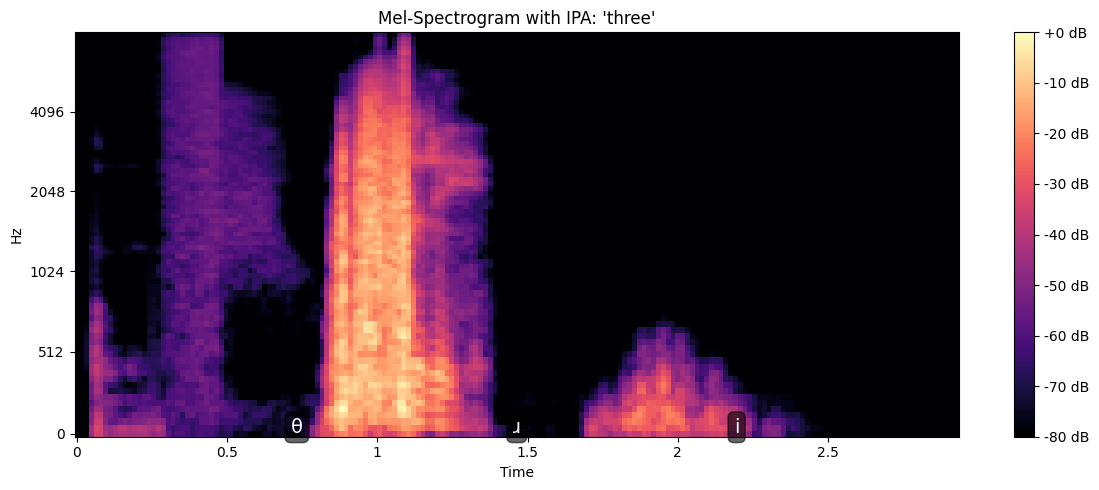

In [14]:
import librosa, librosa.display
import matplotlib.pyplot as plt
import numpy as np
import pronouncing
from IPython.display import Audio, display

# 1. test.wav 로드 및 재생
y, sr = librosa.load("test.wav", sr=16000)
print("[녹음된 음성 재생]")
display(Audio(y, rate=sr))

# 2. 사용자가 발화한 단어 지정 (예: "three")
word = "three"  # 실제 발화한 단어로 수동 지정

# 3. 발음 정보 추출
phones = pronouncing.phones_for_word(word)
arpabet_to_ipa = {
    "TH": "θ", "R": "ɹ", "IY": "i", "IY1": "iː", "IY0": "i", "IY2": "i",
    "F": "f", "AY": "aɪ", "V": "v", "Z": "z", "EH": "ɛ", "T": "t", "UW": "uː",
    "N": "n", "S": "s", "AO": "ɔ", "ER": "ɝ", "OW": "oʊ", "W": "w", "B": "b",
    "D": "d", "AH": "ʌ", "K": "k", "G": "ɡ", "M": "m", "L": "l", "P": "p",
    "Y": "j", "CH": "tʃ", "SH": "ʃ", "ZH": "ʒ"
}
arpabet = phones[0].split()
ipa_seq = [arpabet_to_ipa.get(p.strip("012"), p) for p in arpabet]

# 4. 멜스펙트로그램 생성
n_fft = 1024
hop_length = 256
n_mels = 80
mel = librosa.feature.melspectrogram(y=y, sr=sr, n_fft=n_fft,
                                     hop_length=hop_length, n_mels=n_mels, power=2.0)
mel_db = librosa.power_to_db(mel, ref=np.max)
times = librosa.frames_to_time(np.arange(mel_db.shape[1]), sr=sr, hop_length=hop_length)

# 5. 멜스펙트로그램 시각화 및 IPA 기호 표시
plt.figure(figsize=(12, 5))
librosa.display.specshow(mel_db, sr=sr, hop_length=hop_length,
                         x_axis='time', y_axis='mel', cmap='magma')
plt.colorbar(format="%+2.f dB")
plt.title(f"Mel-Spectrogram with IPA: '{word}'")

n_phonemes = len(ipa_seq)
frame_positions = np.linspace(0, times[-1], n_phonemes + 2)[1:-1]

for ipa, t in zip(ipa_seq, frame_positions):
    plt.text(t, mel_db.shape[0] // 2, ipa,
             fontsize=14, color='white', ha='center', va='center',
             bbox=dict(facecolor='black', alpha=0.6, boxstyle='round'))

plt.tight_layout()
plt.show()

MLP를 이용한 음성 인식 학습

In [17]:
# =============================
# FSDD 음원 다운로드 및 준비
# =============================
# FSDD(Free Spoken Digit Dataset) GitHub에서 클론
!git clone https://github.com/Jakobovski/free-spoken-digit-dataset.git

# recordings 폴더만 이동
!mv free-spoken-digit-dataset/recordings recordings

Cloning into 'free-spoken-digit-dataset'...
remote: Enumerating objects: 4260, done.
remote: Counting objects: 100% (48/48), done.
remote: Compressing objects: 100% (40/40), done.
remote: Total 4260 (delta 25), reused 8 (delta 8), pack-reused 4212 (from 1)
Receiving objects: 100% (4260/4260), 30.38 MiB | 8.20 MiB/s, done.
Resolving deltas: 100% (129/129), done.
Updating files: 100% (3014/3014), done.


In [18]:
import os, librosa, numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import classification_report, accuracy_score
import joblib  # 모델 저장/로딩용

# 1. 데이터 준비
data_path = "recordings"
file_list = [f for f in os.listdir(data_path) if f.endswith(".wav")]

# 학습 대상 파일 수 출력
print(f"총 학습 대상 파일 수: {len(file_list)}개")

X, y = [], []

for fname in file_list:
    label = int(fname[0])  # 파일명 첫 글자가 숫자 레이블
    path = os.path.join(data_path, fname)
    wav, sr = librosa.load(path, sr=16000)
    mfcc = librosa.feature.mfcc(y=wav, sr=sr, n_mfcc=13)
    mfcc_mean = np.mean(mfcc, axis=1)
    X.append(mfcc_mean)
    y.append(label)

X = np.array(X)
y = np.array(y)

# 2. 학습/테스트 분할
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# 3. 정규화 -> 정규화하지 않으면 데이터가 발산하게 된다. weight를 계속 곱하므로 값이 계속 커진다. 이를 막기 위해 정규화한다.
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# 4. MLP 모델 정의 및 학습
mlp = MLPClassifier(hidden_layer_sizes=(64, 32), max_iter=500, random_state=42)
mlp.fit(X_train, y_train)

# 5. 평가
y_pred = mlp.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

# 6. 모델 및 스케일러 저장
joblib.dump(mlp, 'fsdd_mlp_model.joblib')
joblib.dump(scaler, 'fsdd_scaler.joblib')
print("모델과 스케일러가 저장되었습니다.")

총 학습 대상 파일 수: 3000개
Accuracy: 0.9483333333333334
              precision    recall  f1-score   support

           0       0.90      0.95      0.93        60
           1       0.95      0.97      0.96        60
           2       0.91      0.97      0.94        60
           3       0.89      0.85      0.87        60
           4       1.00      1.00      1.00        60
           5       1.00      0.95      0.97        60
           6       0.95      0.95      0.95        60
           7       0.95      0.98      0.97        60
           8       0.98      0.98      0.98        60
           9       0.95      0.88      0.91        60

    accuracy                           0.95       600
   macro avg       0.95      0.95      0.95       600
weighted avg       0.95      0.95      0.95       600

모델과 스케일러가 저장되었습니다.


In [75]:
#음성인식(추론)
import librosa
import numpy as np
import joblib

# 1. 저장된 모델과 스케일러 로드
mlp = joblib.load('fsdd_mlp_model.joblib')
scaler = joblib.load('fsdd_scaler.joblib')

# 2. 추론할 오디오 경로
test_path = 'mine/0.wav'  # 예시

# 3. 특징 추출 (MFCC 평균)
wav, sr = librosa.load(test_path, sr=16000)
mfcc = librosa.feature.mfcc(y=wav, sr=sr, n_mfcc=13)
mfcc_mean = np.mean(mfcc, axis=1).reshape(1, -1)

# 4. 스케일러 적용 후 예측
mfcc_scaled = scaler.transform(mfcc_mean)
pred = mlp.predict(mfcc_scaled)
print(test_path)
print(f"예측 결과: {pred[0]}")

/tmp/ipython-input-75-1473023238.py:14: UserWarning: PySoundFile failed. Trying audioread instead.
  wav, sr = librosa.load(test_path, sr=16000)
/usr/local/lib/python3.11/dist-packages/librosa/core/audio.py:184: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


mine/0.wav
예측 결과: 4
